In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

a = np.arange(8)
b = a[4:6]
b[:] = 40
c = a[4] + a[6]
c

46

In [3]:
import re
s = 'ABCAC'
s

'ABCAC'

In [4]:
#len(re.search('A', s)) == 2

In [5]:
bool(re.match('A', s)) == True

True

In [6]:
re.match('A', s) == True

False

In [7]:
len(re.split('A', s)) == 2

False

In [8]:
def result():
    s = 'ACAABAACAAABACDBADDDFSDDDFFSSSASDAFAAACBAAAFASD'

    result = []
    # compete the pattern below
    pattern = "(\w)(?=[A]{3})"
    for item in re.finditer(pattern, s):
      # identify the group number below.
      result.append(item.group())
      
    return result

result()

['C', 'F', 'B']

In [9]:
S = pd.Series(np.arange(5), index=['a', 'b', 'c', 'd', 'e'])

print(S[['b', 'c', 'd']])

print(S[S <= 3][S > 0])

print(S[1:4])

print(S['b':'e'])

b    1
c    2
d    3
dtype: int32
b    1
c    2
d    3
dtype: int32
b    1
c    2
d    3
dtype: int32
b    1
c    2
d    3
e    4
dtype: int32


In [10]:
df = pd.DataFrame([
    {'a':5,'b':6,'c':20},
    {'a':5,'b':82,'c':28},
    {'a':71,'b':31,'c':92},
    {'a':67,'b':37,'c':49}], 
    index=['R1', 'R2', 'R3','R4'])
df

,a,b,c
R1,5,6,20
R2,5,82,28
R3,71,31,92
R4,67,37,49


In [11]:
f = lambda x: x.max() + x.min()
df_new = df.apply(f)
df_new[1]


C:\Users\Bosideng\AppData\Local\Temp\ipykernel_28700\2493167355.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_new[1]


88

In [12]:
df = pd.DataFrame([
    {'Item':'item_1','Store':'A','Quantity sold':10},
    {'Item':'item_1','Store':'B','Quantity sold':20},
    {'Item':'item_1','Store':'C','Quantity sold':None},
    {'Item':'item_2','Store':'A','Quantity sold':5},
    {'Item':'item_2','Store':'B','Quantity sold':10},
    {'Item':'item_2','Store':'C','Quantity sold':15}])
df

,Item,Store,Quantity sold
0,item_1,A,10.0
1,item_1,B,20.0
2,item_1,C,NaN
3,item_2,A,5.0
4,item_2,B,10.0
5,item_2,C,15.0


In [13]:
df.groupby('Item').sum().iloc[0]['Quantity sold']

30.0

In [14]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import re

cities = pd.read_html("wikipedia_data.html")[1]
cities = cities.iloc[:-1, [0, 3, 5, 6, 7, 8]]
cities.rename(columns={"Population (2016 est.)[8]": "Population"},
              inplace=True)
cities['NFL'] = cities['NFL'].str.replace(r"\[.*\]", "")
cities['MLB'] = cities['MLB'].str.replace(r"\[.*\]", "")
cities['NBA'] = cities['NBA'].str.replace(r"\[.*\]", "")
cities['NHL'] = cities['NHL'].str.replace(r"\[.*\]", "")

Big4='NBA'

def nba_correlation():
    
    team = cities[Big4].str.extract('([A-Z]{0,2}[a-z0-9]*\ [A-Z]{0,2}[a-z0-9]*|[A-Z]{0,2}[a-z0-9]*)([A-Z]{0,2}[a-z0-9]*\ [A-Z]{0,2}[a-z0-9]*|[A-Z]{0,2}[a-z0-9]*)([A-Z]{0,2}[a-z0-9]*\ [A-Z]{0,2}[a-z0-9]*|[A-Z]{0,2}[a-z0-9]*)')
    team['Metropolitan area']=cities['Metropolitan area']
    team = pd.melt(team, id_vars=['Metropolitan area']).drop(columns=['variable']).replace("",np.nan).replace("—",np.nan).dropna().reset_index().rename(columns = {"value":"team"})
    team=pd.merge(team,cities,how='left',on = 'Metropolitan area').iloc[:,1:4]
    team = team.astype({'Metropolitan area': str, 'team': str, 'Population': int})
    team['team']=team['team'].str.replace('[\w.]*\ ','')

    _df=pd.read_csv("assets/"+str.lower(Big4)+".csv")
    _df = _df[_df['year'] == 2018]
    _df['team'] = _df['team'].str.replace(r'[\*]',"")
    _df['team'] = _df['team'].str.replace(r'\(\d*\)',"")
    _df['team'] = _df['team'].str.replace(r'[\xa0]',"")
    _df = _df[['team','W/L%']]
    _df['team'] = _df['team'].str.replace('[\w.]* ','')
    _df = _df.astype({'team': str,'W/L%': float})
    
    merge=pd.merge(team,_df,'outer', on = 'team')
    merge=merge.groupby('Metropolitan area').agg({'W/L%': np.nanmean, 'Population': np.nanmean})

    population_by_region = merge['Population'] # pass in metropolitan area population from cities
    win_loss_by_region = merge['W/L%'] # pass in win/loss ratio from _df in the same order as cities["Metropolitan area"]   

    assert len(population_by_region) == len(win_loss_by_region), "Q2: Your lists must be the same length"
    assert len(population_by_region) == 28, "Q2: There should be 28 teams being analysed for NBA"

    return stats.pearsonr(population_by_region, win_loss_by_region)[0]

In [15]:
rng = np.random.RandomState(1234)

rng.randn(5)



array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873])

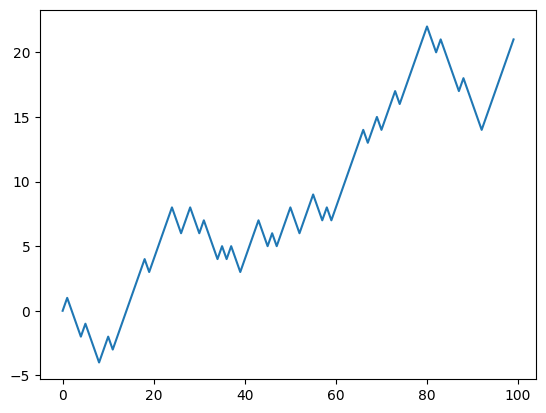

In [16]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
plt.plot(walk[:100])

In [17]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
walk.min()


-7

In [18]:
walk.max()

47

In [19]:
# Whatever the direction, the maximum steps for either positive or negative way.
(np.abs(walk) >= 10).argmax()

53

In [20]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[ 1,  0,  1, ..., -4, -3, -4],
       [-1,  0, -1, ..., 42, 41, 42],
       [ 1,  0,  1, ..., 52, 51, 52],
       ...,
       [-1,  0,  1, ..., 46, 45, 44],
       [-1,  0, -1, ..., 14, 15, 16],
       [-1,  0, -1, ..., 20, 19, 20]])

In [21]:
# maximum and minimum values obtained over all of the walks
walks.max()

115

In [22]:
# maximum and minimum values obtained over all of the walks
walks.min()

-115

In [23]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([ True,  True,  True, ...,  True,  True,  True])

In [24]:
 hits30.sum() # Number that hit 30 or -30

3342

In [25]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)

crossing_times.mean()



500.89766606822263

In [26]:
steps = np.random.normal(loc=0, scale=0.25,size=(nwalks, nsteps))
steps

array([[ 0.34910482, -0.02298137,  0.09976857, ..., -0.3816275 ,
         0.10301944, -0.17842995],
       [-0.12263331, -0.06564607,  0.40001758, ...,  0.14354263,
         0.11633105, -0.27141547],
       [ 0.00856898,  0.32204401,  0.36204494, ...,  0.11741946,
         0.08621728, -0.25353545],
       ...,
       [ 0.38592779,  0.5956943 ,  0.10857046, ..., -0.19058553,
         0.13006565,  0.27825922],
       [ 0.15575885, -0.3156977 , -0.14025583, ...,  0.082897  ,
        -0.27348555,  0.02932748],
       [ 0.65122883, -0.21330602, -0.18647166, ...,  0.087453  ,
        -0.14073638,  0.17268126]])

In [27]:
# Getting started with pandas
import pandas as pd
from pandas import Series, DataFrame

In [28]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [29]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [30]:
obj.index # like range(4)

RangeIndex(start=0, stop=4, step=1)

In [31]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [32]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [33]:
obj2['a']

-5

In [39]:
data = {'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2], 
        'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'], 
        'year': [2000, 2001, 2002, 2001, 2002, 2003]}

In [40]:
frame = pd.DataFrame(data)
frame

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002
5,3.2,Nevada,2003


In [45]:
frame.head() # default is the first 5 rows.

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002


In [47]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'], 
                      index=['one', 'two', 'three', 'four', 
                             'five', 'six'])

In [48]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [49]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [50]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [51]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

In [52]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [53]:
# Insert column into frame

frame2['debt'] = 16.5

In [54]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [55]:
frame2['debt'] = np.arange(6.)

In [59]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


In [62]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])

frame2['debt'] = val

frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [63]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


In [66]:
del frame2['eastern']
frame2.columns
Index(['year', 'state', 'pop', 'debt'], dtype='object')

KeyError: 'eastern'